__CS 6643 - Computer Vision, Spring 2024__

Project 1, Due Date: Feb 22, 2024

Name: Runze Li

Net id: rl50xx

### Programming Questions

The purpose of this project is to get familiar with the coding environment for the rest of the course, reading/writing images, displaying images, and making graphs. You will implement histogram equalization.

__Hint for implementation:__ You can assume an intensity range \[0-255\] and hardcode the size of the histogram to be 256. You can make sure you have an image of type uint8 with min 0 and max 255 with the python code:

In [2]:
# Load the image from the file location
# Rescale the image to desired dimensions (ideal 256x256)
# Convert the image into gray-scale numpy array
# Convert the image to type uint8 and scale intensity values to the range 0-255
# *Note* numpy min/max flatten the 2D array, so you obtain the min/max of the entire image

from PIL import Image
import numpy as np
# original_image = Image.open('file_location')
# resized_image = original_image.resize((256, 256))
# im = np.array(resized_image.convert('L'))
# im_uint8 = ((im-np.min(im)) * (1/(np.max(im)-np.min(im)) * 255)).astype('uint8')

# *Note* im_uint8 is the normalized grayscale image

#### Histogram Equalization

Implement histogram equalization and apply to image __\'people.png\'__, which you will find uploaded on NYU Brightspace. The programming environment supported by our TAs is Python. You are encouraged to use libraries/built in functions to read/and write images and display figures and graphs, __but the rest of the
implementation must be your own.__ That specifically includes creating an image histogram (probability density function), computing the corresponding cumulative distribution function (CDF), and the creation of a new contrast adjusted image.

Write up a report including the following:

- Include a brief introduction and description of how histogram equalization works.
- Show people.png before and after histogram equalization, and the corresponding histograms (PDFs).
- Discuss how the image and histogram have changed, and connect it back to your description in 1).
- Show the cumulative distribution function before and after histogram equalization in a side-by-side figure. Describe what you see. Explain the shape of each CDF and relate it back to image contrast and intensity histogram shape.
- Reapply the histogram equalization procedure on the corrected image. Show and discuss the results.
- Apply histogram equalization to another low contrast image (greyscale). Show and discuss the results.
- Include all code as an appendix, i.e. copy and paste all your code at the end of your report.

In [3]:
import numpy as np

def create_hist(image):
    pixel_count = np.zeros(256)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            intensity = image[i][j]
            pixel_count[intensity] += 1
    return pixel_count

In [4]:
def create_pdf(im_in):
    # Create normalized intensity histogram from an input image
    pdf = np.zeros(256)
    for i in range(im_in.shape[0]):
        for j in range(im_in.shape[1]):
            intensity = int(im_in[i][j])
#             intensity = im_in[i][j]
            pdf[intensity] += 1
    pdf = pdf/im_in.size
    return pdf

In [5]:
def create_cdf(pdf):
    # Create the cumulative distribution function from an input pdf
    cdf = np.zeros(256)
    cdf[0] = pdf[0]
    for i in range(1, 256):
        cdf[i] = cdf[i-1] + pdf[i]
    return cdf

In [6]:
def histogram_equlization(im_in):
    pdf = create_pdf(im_in) # Your previously implemented function
    cdf = create_cdf(pdf)  # Your previously implemented function
    # Create a histogram equalized image using your computed cdf
    equalized_im = np.zeros(len(im_in.ravel()))
    for i, pixel_value in enumerate(im_in.ravel()):
        equalized_im[i] = int(cdf[pixel_value] * 255)
    equalized_im = np.reshape(equalized_im, im_in.shape)
    equalized_im = equalized_im.astype(int)
    
    return equalized_im

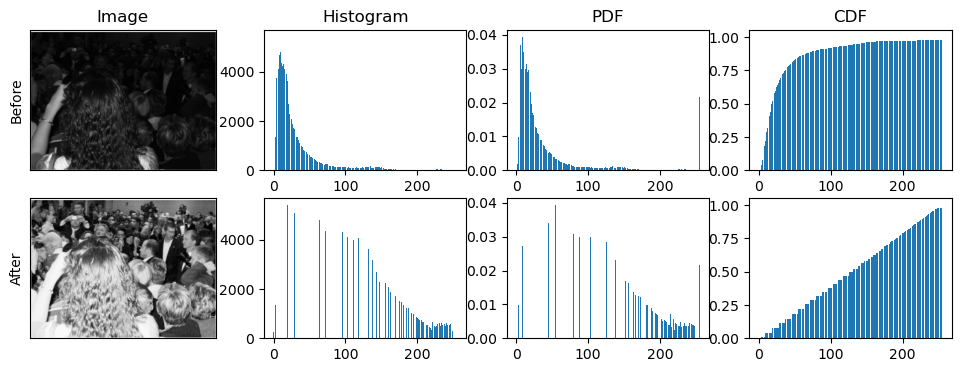

In [7]:
import cv2
from matplotlib import pyplot as plt

image_a1 = 'people.png'

fig, axs = plt.subplots(2, 4, figsize=(12, 4))

im_in = cv2.imread(image_a1, 0)
axs[0, 0].imshow(im_in, cmap='gray')
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])
axs[0, 0].set_ylabel('Before')
axs[0, 0].set_title('Image')

pixel_count = create_hist(im_in)
axs[0, 1].bar(range(256), height=pixel_count)
axs[0, 1].set_title("Histogram")

pdf = create_pdf(im_in)
axs[0, 2].bar(range(256), height=pdf)
axs[0, 2].set_title("PDF")

cdf = create_cdf(pdf)
axs[0, 3].bar(range(256), height=cdf)
axs[0, 3].set_title("CDF")

equalized_im = histogram_equlization(im_in)
axs[1, 0].imshow(equalized_im, cmap='gray')
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])
axs[1, 0].set_ylabel('After')

equalized_pixel = create_hist(equalized_im)
axs[1, 1].bar(range(256), height=equalized_pixel)

equalized_pdf = create_pdf(equalized_im)
axs[1, 2].bar(range(256), height=equalized_pdf)

equalized_cdf = create_cdf(equalized_pdf)
axs[1, 3].bar(range(256), height=equalized_cdf)

plt.show()
fig.savefig('result1.png')

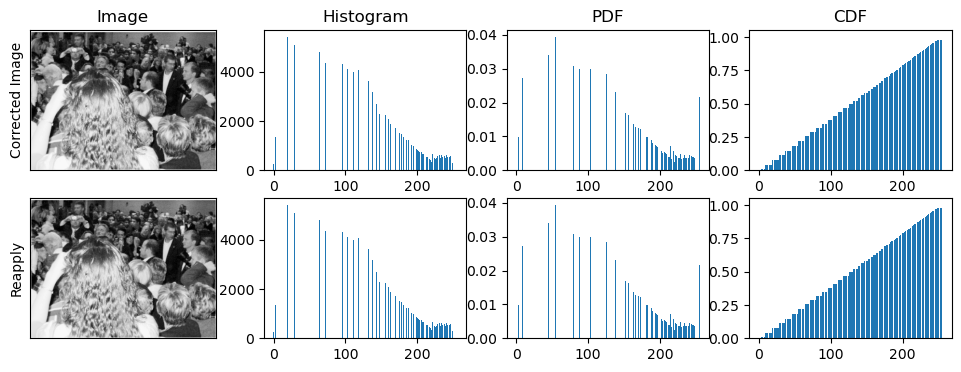

In [8]:
fig, axs = plt.subplots(2, 4, figsize=(12, 4))

axs[0, 0].imshow(equalized_im, cmap='gray')
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])
axs[0, 0].set_ylabel('Corrected Image')
axs[0, 0].set_title('Image')

axs[0, 1].bar(range(256), height=equalized_pixel)
axs[0, 1].set_title("Histogram")

axs[0, 2].bar(range(256), height=equalized_pdf)
axs[0, 2].set_title("PDF")

axs[0, 3].bar(range(256), height=equalized_cdf)
axs[0, 3].set_title("CDF")

reapply_equalized_im = histogram_equlization(equalized_im)
axs[1, 0].imshow(reapply_equalized_im, cmap='gray')
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])
axs[1, 0].set_ylabel('Reapply')

reapply_equalized_pixel = create_hist(reapply_equalized_im)
axs[1, 1].bar(range(256), height=reapply_equalized_pixel)

reapply_equalized_pdf = create_pdf(reapply_equalized_im)
axs[1, 2].bar(range(256), height=reapply_equalized_pdf)

reapply_equalized_cdf = create_cdf(reapply_equalized_pdf)
axs[1, 3].bar(range(256), height=reapply_equalized_cdf)

plt.show()
fig.savefig('result2.png')

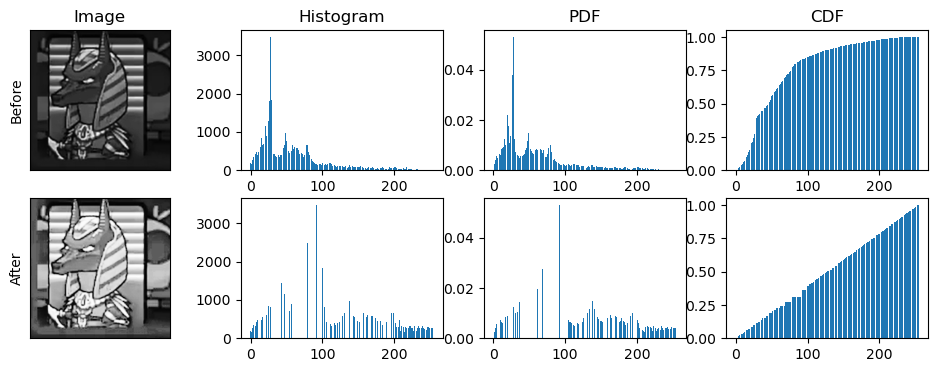

In [9]:
original_image = Image.open('gooseGooseDuck.png')
resized_image = original_image.resize((256, 256))
im = np.array(resized_image.convert('L'))
im_uint8 = ((im-np.min(im)) * (1/(np.max(im)-np.min(im)) * 255)).astype('uint8')

fig, axs = plt.subplots(2, 4, figsize=(12, 4))

# im_in = cv2.imread(im_uint8, 0)
axs[0, 0].imshow(im_uint8, cmap='gray')
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])
axs[0, 0].set_ylabel('Before')
axs[0, 0].set_title('Image')

pixel_count = create_hist(im_uint8)
axs[0, 1].bar(range(256), height=pixel_count)
axs[0, 1].set_title("Histogram")

pdf = create_pdf(im_uint8)
axs[0, 2].bar(range(256), height=pdf)
axs[0, 2].set_title("PDF")

cdf = create_cdf(pdf)
axs[0, 3].bar(range(256), height=cdf)
axs[0, 3].set_title("CDF")

equalized_im = histogram_equlization(im_uint8)
axs[1, 0].imshow(equalized_im, cmap='gray')
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])
axs[1, 0].set_ylabel('After')

equalized_pixel = create_hist(equalized_im)
axs[1, 1].bar(range(256), height=equalized_pixel)

equalized_pdf = create_pdf(equalized_im)
axs[1, 2].bar(range(256), height=equalized_pdf)

equalized_cdf = create_cdf(equalized_pdf)
axs[1, 3].bar(range(256), height=equalized_cdf)

plt.show()
fig.savefig('result3.png')

#### Otsu Image Thresholding

For this section, you will implement __Otsu thresholding__ algorithms to generate binarized images (where pixels are set to either 0 or 255 to produce a fully black and white image). See images __b2_a.png, b2_b.png, and b2_c.png__ on NYU Brightspace alongside the assignment. . Please note that b2_b is an original microscopy image, and b2_c is the image corrected by multiplication with an illumination bias field as discussed in our first lecture (see slides). __Show results for all of these images in your assignment.__

Write code to generate a __binary image__ using a __manually chosen threshold.__ Show the resulting binary image given a threshold of your choice, and add the threshold value to the report.

In [13]:
def manual_threshold(im_in, threshold):
    # Threshold image with the threshold of your choice
    manual_thresh_img = np.zeros_like(im_in)
    manual_thresh_img[im_in > threshold] = 255
    return manual_thresh_img

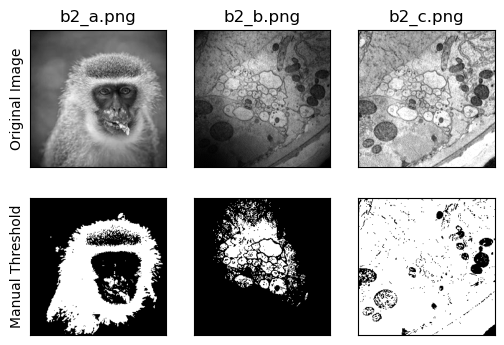

In [14]:
image_a2 = ['b2_a.png', 'b2_b.png', 'b2_c.png']

manual_threshold_value = 128

fig, axs = plt.subplots(2, 3, figsize=(6, 4))

for i in range(len(image_a2)):
    im_in = cv2.imread(image_a2[i], 0)
    axs[0, i].imshow(im_in, cmap='gray')
    axs[0, i].set_xticks([])
    axs[0, i].set_yticks([])
    axs[0, i].set_title(image_a2[i])
    
    manual_thresh_img = manual_threshold(im_in, manual_threshold_value)
    axs[1, i].imshow(manual_thresh_img, cmap='gray')
    axs[1, i].set_xticks([])
    axs[1, i].set_yticks([])
    
axs[0, 0].set_ylabel('Original Image')
axs[1, 0].set_ylabel('Manual Threshold')

plt.show()
fig.savefig('result4.png')

Otsu’s Method is an algorithm to perform image thresholding with automatic threshold selection. The algorithm clusters image pixels into one of two possible classes by maximizing inter-class variance over the whole image. See https://en.wikipedia.org/wiki/Otsu%27s_method and Otsu.pdf on NYU Brightspace alongside the assignment for more details. Here, you will write code to implement Otsu’s Method and threshold the same three images above.

- Show the histograms for each image
- Generate a plot of the inter-class variance as a function of the chosen threshold (i.e., x-axis with each possible threshold from 0-255, y-axis with the resulting variance)
- State the inter-class variance of the image upon completion of the algorithm
- Note the intensity threshold chosen by the algorithm
- Show the resulting binary image produced by the algorithm
- Discuss the results.
    - Does the automatic threshold produce a decent result?
        - If yes: what elements of the image are separated from each other? Are there any improvements that could still be made?
        - If no: why does the algorithm fail to produce a decent result?
- Include all code as an appendix, i.e. copy and paste all your code at the end of your report.

In [11]:
def otsu_intraclass_variance(image, threshold):
    """
    Otsu’s intra-class variance.
    If all pixels are above or below the threshold, this will throw a warning that can safely be ignored.
    """
    return np.nansum([
        np.mean(cls) * np.var(image,where=cls)
        #   weight   ·  intra-class variance
        for cls in [image>=threshold,image<threshold]
    ])
    # NaNs only arise if the class is empty, in which case the contribution should be zero, which `nansum` accomplishes.

In [12]:
def otsu_threshold(im_in):
    # Create Otsu thresholded image
    otsu_threshold_value = min(
            range( np.min(im_in)+1, np.max(im_in) ),
            key = lambda th: otsu_intraclass_variance(im_in,th)
        )
    otsu_thresh_img = manual_threshold(im_in, otsu_threshold_value)
#     return otsu_thresh_img
    return otsu_thresh_img, otsu_threshold_value

Inter-class Variance of b2_a.png : 132
Inter-class Variance of b2_b.png : 86
Inter-class Variance of b2_c.png : 171


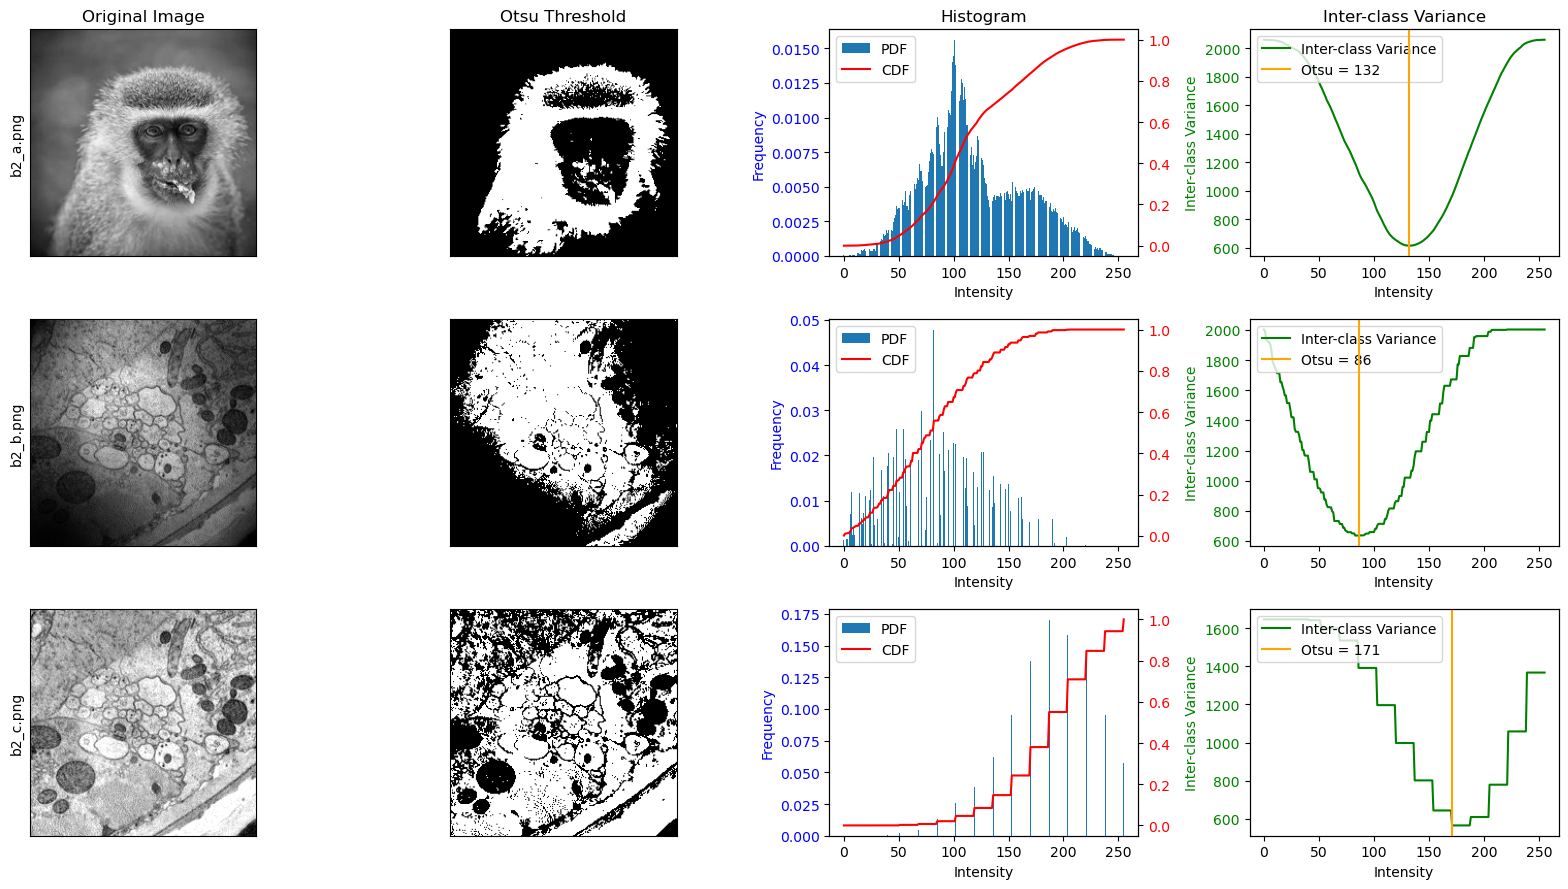

In [14]:
fig, axs = plt.subplots(3, 4, figsize=(16, 9))

for i in range(len(image_a2)):
    im_in = cv2.imread(image_a2[i], 0)
    axs[i, 0].imshow(im_in, cmap='gray')
    axs[i, 0].set_xticks([])
    axs[i, 0].set_yticks([])
    axs[i, 0].set_ylabel(image_a2[i])
    
    otsu_thresh_img, otsu_thresh_value = otsu_threshold(im_in)
    print('Inter-class Variance of', image_a2[i], ':', otsu_thresh_value)
    axs[i, 1].imshow(otsu_thresh_img, cmap='gray')
    axs[i, 1].set_xticks([])
    axs[i, 1].set_yticks([])
    
    ax = axs[i, 2]
    pixel_count = create_hist(im_in)
    pdf = create_pdf(im_in)
    cdf = create_cdf(pdf)
    ax.bar(range(256), height=pdf, label='PDF')
    ax.set_xlabel('Intensity')
    ax.set_ylabel('Frequency', color='b')
    ax.tick_params(axis='y', labelcolor='b')
    # Compute inter-class variances for each intensity
    intensity_values = np.arange(0, 256)
    variances = [otsu_intraclass_variance(im_in, threshold) for threshold in intensity_values]
    ax1 = ax.twinx()
    ax1.plot(intensity_values, cdf, color='r', label='CDF')
    ax1.tick_params(axis='y', labelcolor='r')
    
    ax2 = axs[i, 3]
#     ax2.plot(intensity_values, np.reciprocal(variances), color='g', label='Inter-class Variance')
    ax2.plot(intensity_values, variances, color='g', label='Inter-class Variance')
    ax2.set_xlabel('Intensity')
    ax2.set_ylabel('Inter-class Variance', color='g')
    ax2.tick_params(axis='y', labelcolor='g')
    ax3 = ax2.twinx()
    ax3.axvline(x=otsu_thresh_value,
                      color='orange',
                      label='Otsu = ' + str(otsu_thresh_value))
#     ax3.set_xticks([])
    ax3.set_yticks([])
#     legend = axs[i, 2].legend(loc='upper right')
#     legend.set_zorder(10)
    
    lines, labels = ax.get_legend_handles_labels()
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines3, labels3 = ax3.get_legend_handles_labels()
    ax.legend(lines + lines1, labels + labels1, loc='upper left')
    ax2.legend(lines2 + lines3, labels2 + labels3, loc='upper left')
    
axs[0, 0].set_title('Original Image')
axs[0, 1].set_title('Otsu Threshold')
axs[0, 2].set_title("Histogram")
axs[0, 3].set_title("Inter-class Variance")

fig.tight_layout()
plt.show()
fig.savefig('result5.png')

####  Creative Part

Now that you have a code for histogram equalization, you can apply, extend and test the method to applications on your own. Choose the specific area of histogram matching and test the method on your own images.

Histogram matching: Instead of histogram equalization, we can choose a source image (to be improved) and a target image (with good contrast). Implement histogram matching (discussed on the last page of the hand-written notes on histogram analysis. Test how this works with a target image of similar scene content, or with an image from a completely different scene.

In [15]:
def histogram_matching(source_im, target_im):
    source_pdf = create_pdf(source_im)
    source_cdf = create_cdf(source_pdf)
    target_pdf = create_pdf(target_im)
    target_cdf = create_cdf(target_pdf)
    
    lut = np.interp(source_cdf, target_cdf, range(256))
    matched_im = lut[source_im]
    
    return matched_im

In [16]:
original_image = Image.open('cat.png')
resized_image = original_image.resize((256, 256))
im = np.array(resized_image.convert('L'))
source_im = ((im-np.min(im)) * (1/(np.max(im)-np.min(im)) * 255)).astype('uint8')

original_image = Image.open('coffee.png')
resized_image = original_image.resize((256, 256))
im = np.array(resized_image.convert('L'))
target_im = ((im-np.min(im)) * (1/(np.max(im)-np.min(im)) * 255)).astype('uint8')

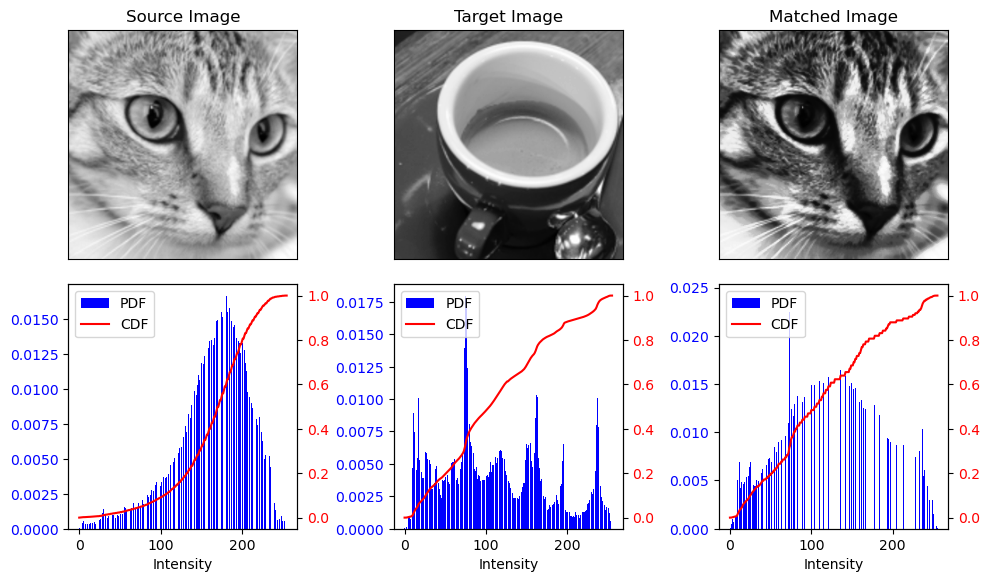

In [17]:
matched_im = histogram_matching(source_im, target_im)

image_a3 = [source_im, target_im, matched_im]
image_a3_title = ['Source Image', 'Target Image', 'Matched Image']

fig, axs = plt.subplots(2, 3, figsize=(10, 6))

for i in range(3):
    axs[0, i].imshow(image_a3[i], cmap='gray')
    axs[0, i].set_xticks([])
    axs[0, i].set_yticks([])
    axs[0, i].set_title(image_a3_title[i])
    
    pdf = create_pdf(image_a3[i])
    cdf = create_cdf(pdf)
    intensity_values = np.arange(0, 256)
    
    ax = axs[1, i]
    ax.bar(range(256), height=pdf, color='b', label='PDF')
    ax.tick_params(axis='y', labelcolor='b')
    ax2 = ax.twinx()
    ax2.plot(intensity_values, cdf, color='r', label='CDF')
    ax2.tick_params(axis='y', labelcolor='r')
    axs[1, i].set_xlabel('Intensity')
    
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')


# axs[0, 0].set_title('Image')
# axs[0, 1].set_title('Histogram')
# axs[2, 1].set_xlabel('Intensity')

fig.tight_layout()
plt.show()
fig.savefig('result6.png')